## Analyse exploratoire

Vous travaillez pour les services des secoures et vous êtes en charge de développer une application
web capable de prédire le risque d’accident pour un jour donné afin de de mobiliser les service de
secours nécessaire et de les mettre à disposition. La prédiction peut se faire en fonction des
conditions :
- Atmosphériques
- De luminosité
- De circulation
- Etat de la surface
- Jour de la semaine

In [182]:
import pandas as pd
import numpy as np

caracteristiques = pd.read_csv("donnees/caracteristiques2-2019.csv")
print("Caractéristiques")
print(caracteristiques.columns.to_list())

lieux = pd.read_csv("donnees/lieux-2019.csv",sep=";")
print("Lieux")
print(lieux.columns.to_list())

usagers = pd.read_csv("donnees/usagers-2019.csv",sep=";")
usagers.loc[usagers.grav==2, 'grav']=7
usagers.loc[usagers.grav==4, 'grav']=5
usagers.loc[usagers.grav==7, 'grav']=4
usagers.loc[usagers.grav==5, 'grav']=2
print("Usagers")
print(usagers.columns.to_list())


vehicules = pd.read_csv("donnees/vehicules-2019.csv",sep=";")
print("Véhicules")
print(vehicules.columns.to_list())

Caractéristiques
['Unnamed: 0', 'Num_Acc', 'jour', 'mois', 'hrmn', 'lum', 'dep', 'com', 'agg', 'atm', 'weekday', 'time', 'grav']
Lieux
['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ', 'vma']
Usagers
['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']
Véhicules
['Num_Acc', 'id_vehicule', 'num_veh', 'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc']


## Colonnes à sélectionner :

- Caractéristiques : jour, mois, hrmn, lum, atm, dep
- Lieux : surf
- Usagers : grav

In [72]:
caracteristiques["com"].value_counts()

75116    629
75112    431
75117    424
31555    403
75119    401
        ... 
80015      1
80136      1
67421      1
79259      1
76462      1
Name: com, Length: 11444, dtype: int64

In [56]:
# import datetime

# caracteristiques["weekday"]=0
# caracteristiques["time"]=1.1

# for i in range(len(caracteristiques)):
#     caracteristiques.iloc[i, 15] = datetime.date(caracteristiques["an"][i],caracteristiques["mois"][i],caracteristiques["jour"][i]).weekday()
#     t=datetime.datetime.strptime(caracteristiques["hrmn"][i], '%H:%M')
#     caracteristiques.iloc[i, 16]=t.hour+t.minute/60.0

# caracteristiques.to_csv("donnees/caracteristiques_weekdaytime.csv")

In [73]:
caracteristiques

,Unnamed: 0,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long,weekday,time
0,0,201900000001,30,11,2019,01:30,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",5,1.500000
1,1,201900000002,30,11,2019,02:50,3,93,93066,1,1,1,6,AUTOROUTE A1,"48,9307000","2,3688000",5,2.833333
2,2,201900000003,28,11,2019,15:15,1,92,92036,1,1,1,4,AUTOROUTE A86,"48,9358718","2,3191744",3,15.250000
3,3,201900000004,30,11,2019,20:20,5,94,94069,1,1,1,4,A4,"48,8173295","2,4281502",5,20.333333
4,4,201900000005,30,11,2019,04:00,3,94,94028,1,1,1,2,A86 INT,"48,7763620","2,4332540",5,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58835,58835,201900058836,30,11,2019,09:00,1,69,69288,1,1,5,2,A43 13.029 A 15.971,"45,6666600","5,0561200",5,9.000000
58836,58836,201900058837,27,11,2019,07:50,1,67,67482,1,1,8,4,Autoroute A.35,"48,5769000","7,7269000",2,7.833333
58837,58837,201900058838,30,11,2019,02:41,4,94,94021,1,1,1,6,AUTOROUTE A6A,"48,7717000","2,3457600",5,2.683333
58838,58838,201900058839,30,11,2019,15:20,1,78,78640,1,1,1,7,A86 EXT,"48,7772890","2,2237590",5,15.333333


In [74]:
usagers

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,201900000001,138 306 524,B01,2,2,4,2,2002,0,1,0,-1,-1,-1,-1
1,201900000001,138 306 524,B01,1,1,4,2,1993,5,1,0,-1,-1,-1,-1
2,201900000001,138 306 525,A01,1,1,1,1,1959,0,1,0,-1,-1,-1,-1
3,201900000002,138 306 523,A01,1,1,4,2,1994,0,1,0,-1,-1,-1,-1
4,201900000003,138 306 520,A01,1,1,1,1,1996,0,1,0,-1,-1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132972,201900058837,137 982 135,C01,1,1,4,2,1988,1,1,0,-1,-1,-1,-1
132973,201900058838,137 982 132,A01,1,1,4,1,1998,9,1,0,-1,-1,-1,-1
132974,201900058839,137 982 131,A01,1,1,3,1,1979,0,2,0,-1,-1,-1,-1
132975,201900058840,137 982 129,B01,1,1,4,1,1974,0,1,0,-1,-1,0,-1


## grav
Gravité de blessure de l'usager, les usagers accidentés sont classés en trois catégories de victimes plus les indemnes :

1 – Indemne

2 – Tué ==> 7 ==> 4

3 – Blessé hospitalisé ==> 6 ==> 3

4 – Blessé léger ==> 5 ==> 2

In [82]:
print(usagers["grav"].value_counts())

usagers.loc[usagers.grav==2, 'grav']=7
usagers.loc[usagers.grav==4, 'grav']=5

usagers.loc[usagers.grav==7, 'grav']=4
usagers.loc[usagers.grav==5, 'grav']=2

print(usagers["grav"].value_counts())

1    55314
4    53307
3    20858
2     3498
Name: grav, dtype: int64
1    55314
2    53307
3    20858
4     3498
Name: grav, dtype: int64


In [95]:
columns= ["jour", "mois", "hrmn", "lum", "atm", "dep"]


print("Usagers")
for column in usagers.columns:
    print(column)
    print("isna :",usagers[column].isna().sum())
    print("value counts:",usagers[column].value_counts())
    print("")

Usagers
Num_Acc
isna : 0
value counts: 201900049689    33
201900029632    30
201900027084    25
201900052213    24
201900057551    24
                ..
201900022306     1
201900048830     1
201900022305     1
201900002989     1
201900024224     1
Name: Num_Acc, Length: 58840, dtype: int64

id_vehicule
isna : 0
value counts: 138 212 691    33
138 250 566    30
138 255 393    25
138 212 361    23
138 225 436    22
               ..
138 264 141     1
138 264 140     1
138 264 139     1
138 264 143     1
137 982 130     1
Name: id_vehicule, Length: 98670, dtype: int64

num_veh
isna : 0
value counts: A01     80464
B01     44394
C01      5465
D01      1205
Z01       814
E01       292
F01       113
Y01        63
G01        47
H01        22
T01        17
I01        16
M01        11
K01        10
J01         8
L01         8
W01         4
Q01         4
X01         4
O01         3
N01         3
U01         2
MA01        2
V01         1
LB01        1
CB01        1
\01         1
VF01        1
P01 

In [101]:
print("Carac")
columns= ["jour", "mois", "hrmn", "lum", "atm", "dep", "weekday", "time"]

for column in columns:
    print(column)
    print("isna :",caracteristiques[column].isna().sum())
    print("value counts:",caracteristiques[column].value_counts())
    print("")

Carac
jour
isna : 0
value counts: 18    2080
13    2050
7     2031
4     2028
12    2026
20    2014
15    2013
16    1989
6     1978
14    1964
5     1958
26    1947
19    1939
22    1927
9     1926
11    1925
21    1925
8     1923
25    1916
17    1912
2     1891
10    1889
24    1867
23    1855
27    1836
1     1822
28    1799
3     1761
29    1760
30    1745
31    1144
Name: jour, dtype: int64

mois
isna : 0
value counts: 7     5520
6     5442
10    5376
9     5344
12    5087
11    4893
5     4868
3     4717
4     4616
8     4466
2     4286
1     4225
Name: mois, dtype: int64

hrmn
isna : 0
value counts: 18:00    784
17:30    692
18:30    676
17:00    672
16:00    615
        ... 
01:31      1
00:13      1
20:41      1
03:53      1
03:22      1
Name: hrmn, Length: 1386, dtype: int64

lum
isna : 0
value counts: 1    39002
5     9592
3     5948
2     3781
4      517
Name: lum, dtype: int64

atm
isna : 0
value counts:  1    46528
 2     6597
 8     2202
 3     1457
 7     1035
 5      

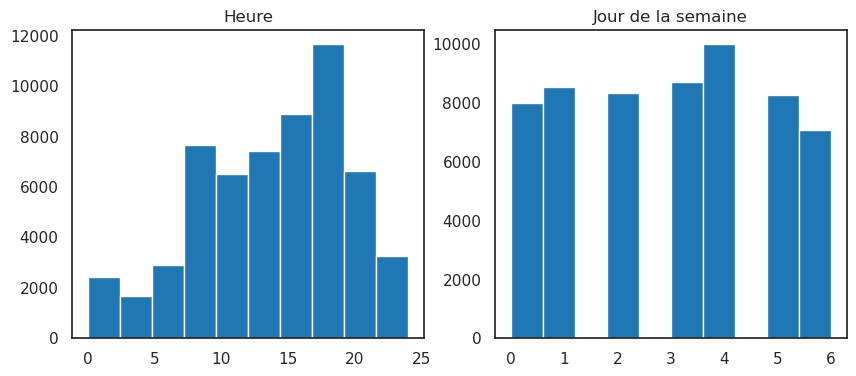

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_context("notebook")

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(caracteristiques["time"])
plt.title("Heure")

plt.subplot(122)
plt.hist(caracteristiques["weekday"])
plt.title("Jour de la semaine")

plt.show()
plt.close()

In [185]:
caracteristiques = caracteristiques[caracteristiques['atm']!=-1]
caracteristiques2=caracteristiques.drop(columns=['an','int','col','adr','lat','long','Unnamed: 0'])
usagers2=usagers.drop(columns=['id_vehicule','num_veh','place','catu','sexe','an_nais','trajet','secu1','secu2','secu3','locp','actp','etatp'])
merge= usagers2.merge(caracteristiques2)
merge

KeyError: "['an' 'int' 'col' 'adr' 'lat' 'long'] not found in axis"

In [136]:
max(merge['grav'][merge['Num_Acc']==201900000001])

2

In [142]:
caracteristiques2["grav"]=0

for i in range(len(caracteristiques2)):
    caracteristiques2.iloc[i, 11] = max(merge['grav'][merge['Num_Acc']==caracteristiques2.iloc[i, 0]])

In [186]:
caracteristiques2.drop(["hrmn","com"],axis=1)
caracteristiques2=caracteristiques2.reindex()
caracteristiques2

,level_0,index,Num_Acc,jour,mois,hrmn,lum,dep,com,agg,atm,weekday,time,grav
0,0,0,201900000001,30,11,01:30,4,93,93053,1,1,5,1.500000,2
1,1,1,201900000002,30,11,02:50,3,93,93066,1,1,5,2.833333,2
2,2,2,201900000003,28,11,15:15,1,92,92036,1,1,3,15.250000,2
3,3,3,201900000004,30,11,20:20,5,94,94069,1,1,5,20.333333,2
4,4,4,201900000005,30,11,04:00,3,94,94028,1,1,5,4.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58834,58834,58835,201900058836,30,11,09:00,1,69,69288,1,5,5,9.000000,2
58835,58835,58836,201900058837,27,11,07:50,1,67,67482,1,8,2,7.833333,2
58836,58836,58837,201900058838,30,11,02:41,4,94,94021,1,1,5,2.683333,2
58837,58837,58838,201900058839,30,11,15:20,1,78,78640,1,1,5,15.333333,3


In [156]:
caracteristiques2.to_csv("donnees/caracteristiques2-2019.csv")

In [158]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.kernel_approximation import PolynomialCountSketch, RBFSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [190]:
num_attribs=["time"]
cat_attribs=["dep","atm","lum"]

num_pipeline = Pipeline([
    ('std_scaler',StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_pipeline),
    ("cat", OneHotEncoder(), cat_attribs)
])

def learning(pipeline):
    ac_score = []

    skf = StratifiedKFold(n_splits=100)

    for train_index, test_index in skf.split(caracteristiques2,caracteristiques2["grav"]):

        data_train, data_test = caracteristiques2.loc[train_index], caracteristiques2.loc[test_index]

        X_train = pipeline.fit_transform(data_train)
        y_train = np.array(data_train["grav"])

        X_test = pipeline.transform(data_test)
        y_test = np.array(data_test["grav"])

        model = GaussianNB()
        model.fit(X_train, y_train)
        ac_score.append(accuracy_score(y_test, model.predict(X_test)))

    print("*****************")
    print("Precision moyenne : ", np.mean(ac_score))
    return np.mean(ac_score)


In [189]:
learning(full_pipeline)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed